## Informações dos Dados

5 Sets de A até E:


*   A: Pacientes saudáveis com olhos abertos
*   B: Pacientes saudáveis com olhos fechados
*   C: Período livre de convulsão fora da zona onset
*   D: Período livre de convulsão dentro da zona onset
*   E: Convulsão

Cada Set contém 100 segmentos de 23.6s cada em 173.61Hz



In [1]:
#Bibliotecas essenciais
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Bibliotecas auxiliares
import os
import random
from tqdm import tqdm

# Ferramentas Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# PyTorch bibliotecas e módulos
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

path = '/content/drive/MyDrive/EEG_BonnDataset/'

In [2]:
Sets_Paths = ['Set_A/', 'Set_B/', 'Set_C/','Set_D/', 'Set_E/',]

def create_set_dataframe(Set_Path, Set_Files_List):
  DataFrame = pd.read_csv(Set_Path + Set_Files_List[0], names=Set_Files_List)

  for i in range(1, len(Set_Files_List)):
    with open(Set_Path + Set_Files_List[i]) as file:
      column = []
      for line in file:
        column.append(int(line.rstrip()))

    DataFrame[Set_Files_List[i]] = column

  return DataFrame

In [3]:
Set_Path = path + Sets_Paths[0]
Set_A_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[1]
Set_B_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[2]
Set_C_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[3]
Set_D_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[4]
Set_E_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))


In [4]:
def create_time_seizure_column(frequency, start_time, dataframe, seizure):
  time_list = []
  time = frequency**-1

  for i in range(0, 4097):
    rounded_time = round(start_time , 4)
    time_list.append(rounded_time)
    start_time = start_time + time
  
  dataframe['time'] = time_list

  if seizure==0:
    dataframe['seizure'] = 'healthy'
  if seizure==1:
    dataframe['seizure'] = 'unhealthy'
  if seizure==2:
    dataframe['seizure'] = 'seizure'

    

In [5]:
create_time_seizure_column(173.61, 0.00, Set_A_DataFrame,0)
create_time_seizure_column(173.61, 0.00, Set_B_DataFrame,0)
create_time_seizure_column(173.61, 0.00, Set_C_DataFrame,1)
create_time_seizure_column(173.61, 0.00, Set_D_DataFrame,1)
create_time_seizure_column(173.61, 0.00, Set_E_DataFrame,2)


print(Set_A_DataFrame.loc[[3799]])
Set_A_DataFrame.head()

      Z001.txt  Z002.txt  Z003.txt  ...  Z100.txt     time  seizure
3799        15       -94       -23  ...        -5  21.8824  healthy

[1 rows x 102 columns]


,Z001.txt,Z002.txt,Z003.txt,Z004.txt,Z005.txt,Z006.txt,Z007.txt,Z008.txt,Z009.txt,Z010.txt,Z011.txt,Z012.txt,Z013.txt,Z014.txt,Z015.txt,Z016.txt,Z017.txt,Z018.txt,Z019.txt,Z020.txt,Z021.txt,Z022.txt,Z023.txt,Z024.txt,Z025.txt,Z026.txt,Z027.txt,Z028.txt,Z029.txt,Z030.txt,Z031.txt,Z032.txt,Z033.txt,Z034.txt,Z035.txt,Z036.txt,Z037.txt,Z038.txt,Z039.txt,Z040.txt,...,Z063.txt,Z064.txt,Z065.txt,Z066.txt,Z067.txt,Z068.txt,Z069.txt,Z070.txt,Z071.txt,Z072.txt,Z073.txt,Z074.txt,Z075.txt,Z076.txt,Z077.txt,Z078.txt,Z079.txt,Z080.txt,Z081.txt,Z082.txt,Z083.txt,Z084.txt,Z085.txt,Z086.txt,Z087.txt,Z088.txt,Z089.txt,Z090.txt,Z091.txt,Z092.txt,Z093.txt,Z094.txt,Z095.txt,Z096.txt,Z097.txt,Z098.txt,Z099.txt,Z100.txt,time,seizure
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,14,-64,10,31,30,34,-62,-18,0,-20,-58,6,-40,-1,28,67,19,-4,-42,96,-21,-41,-26,-10,-19,40,-49,-73,18,63,...,-40,-20,-9,-15,-49,20,-25,-13,13,113,-17,-48,24,39,57,-8,69,-34,36,20,-56,-20,-44,-21,-2,-1,16,-30,13,40,-19,-45,6,-133,-3,-51,56,-36,0.0000,healthy
1,22,-50,-22,-43,26,-89,20,-16,17,-38,25,-72,-6,25,19,34,-55,-9,2,-3,-59,-14,-13,-40,30,86,14,4,-49,43,-29,-37,-29,-9,-39,60,-48,-66,34,43,...,-33,-43,15,-23,-59,21,7,-4,21,129,-36,-52,10,41,82,-19,69,-21,27,27,-55,-14,-63,-14,-8,-11,24,-34,30,48,-1,-62,-6,-144,-3,-42,55,-71,0.0058,healthy
2,35,-64,-17,-39,32,-73,42,10,29,-31,31,-52,-14,17,-3,31,-44,9,-1,2,-60,-33,43,-56,8,89,23,10,-37,71,-34,-29,-39,-33,-41,74,-46,-59,45,47,...,-16,-47,35,-25,-56,19,37,2,39,108,-52,-63,-9,43,93,-32,65,-17,24,-5,-53,-12,-85,-12,-27,-11,33,-33,42,35,33,-76,-8,-113,-12,-39,38,-120,0.0115,healthy
3,45,-91,-24,-39,25,-69,48,28,46,-25,36,-24,-14,7,-14,4,-42,33,14,16,-52,-43,69,-10,-9,65,30,15,-12,87,-34,-37,-30,-24,-16,70,-32,-58,37,53,...,15,-37,37,-23,-56,12,40,21,46,60,-66,-55,-18,36,68,-40,59,-27,12,-32,-58,-22,-73,-26,-43,-21,23,5,56,5,51,-98,-6,-74,-24,-47,-5,-150,0.0173,healthy
4,69,-135,-31,-9,16,-51,27,31,50,-32,33,4,-9,4,-12,-15,-33,52,36,29,-47,-40,55,33,-2,19,46,15,0,108,-44,-32,-1,-61,5,67,-34,-53,35,70,...,39,-28,19,-18,-43,13,26,25,48,3,-62,-41,-9,24,23,-55,43,-48,6,-38,-73,-36,-72,-60,-39,-32,9,31,56,-40,49,-108,15,-41,-34,-51,-47,-160,0.0230,healthy


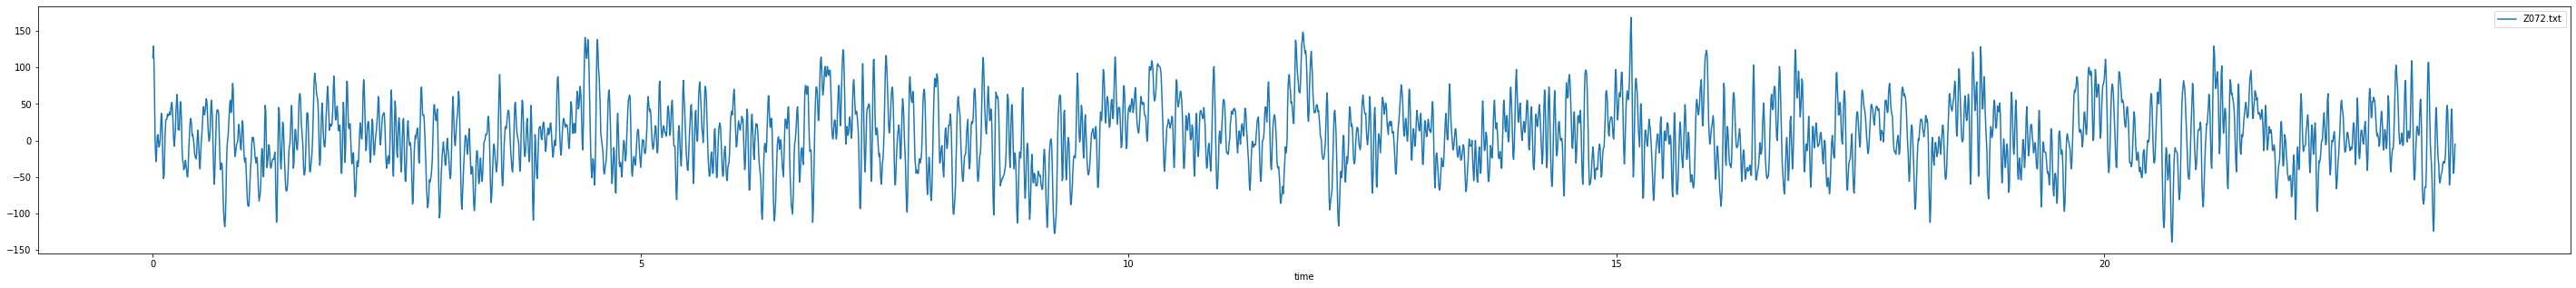

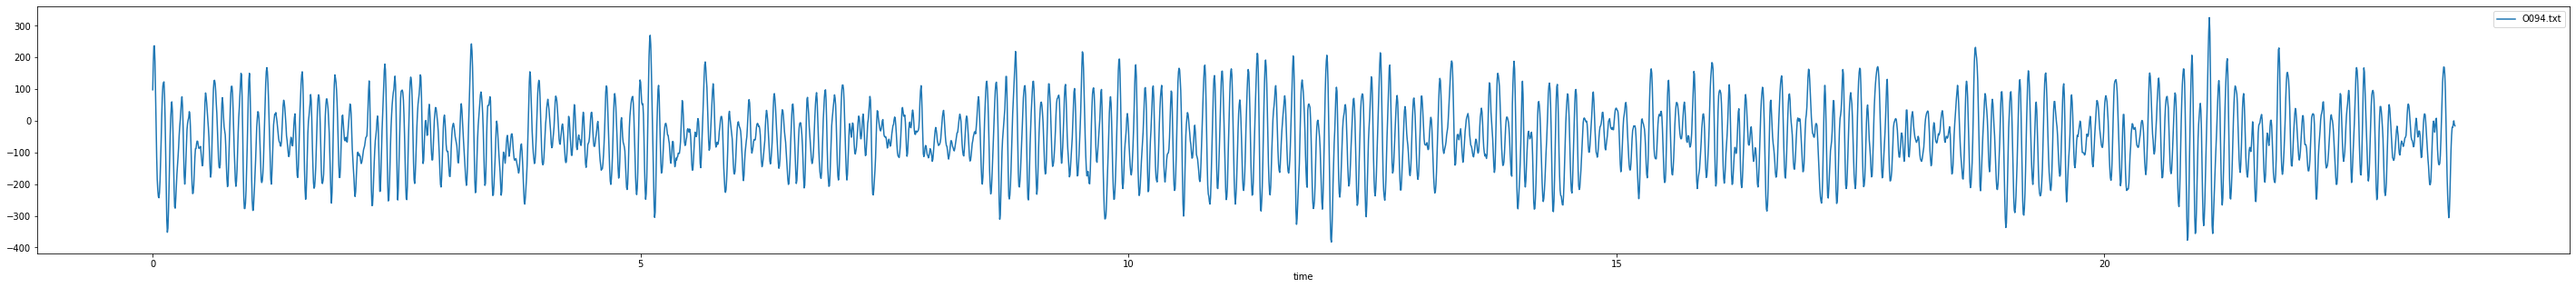

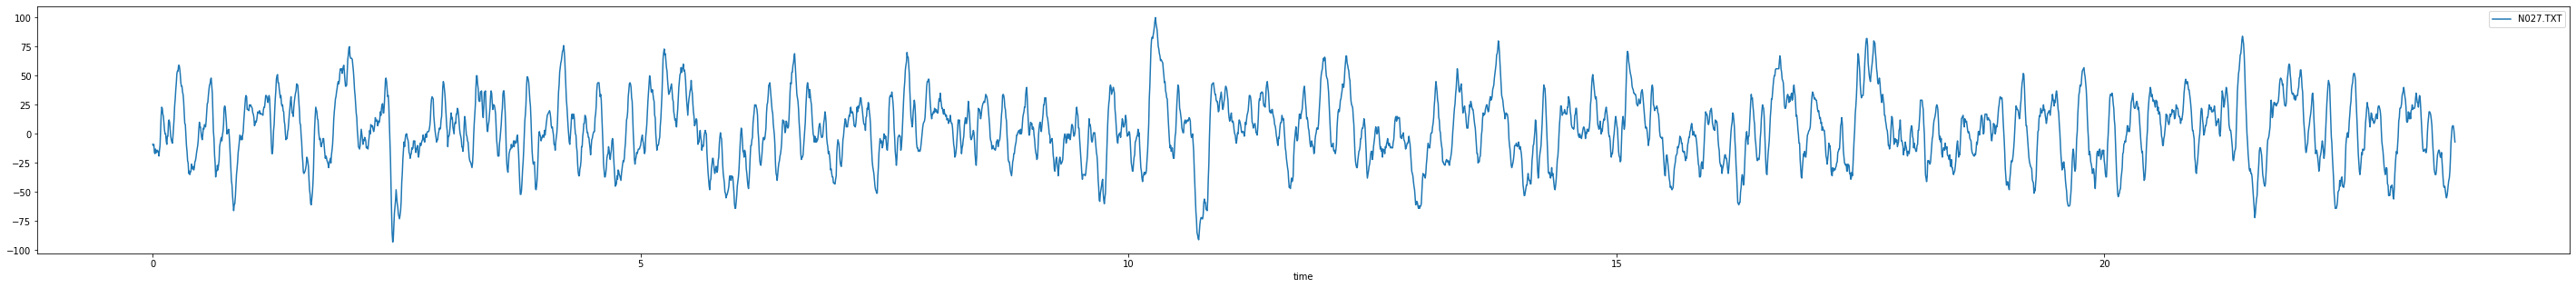

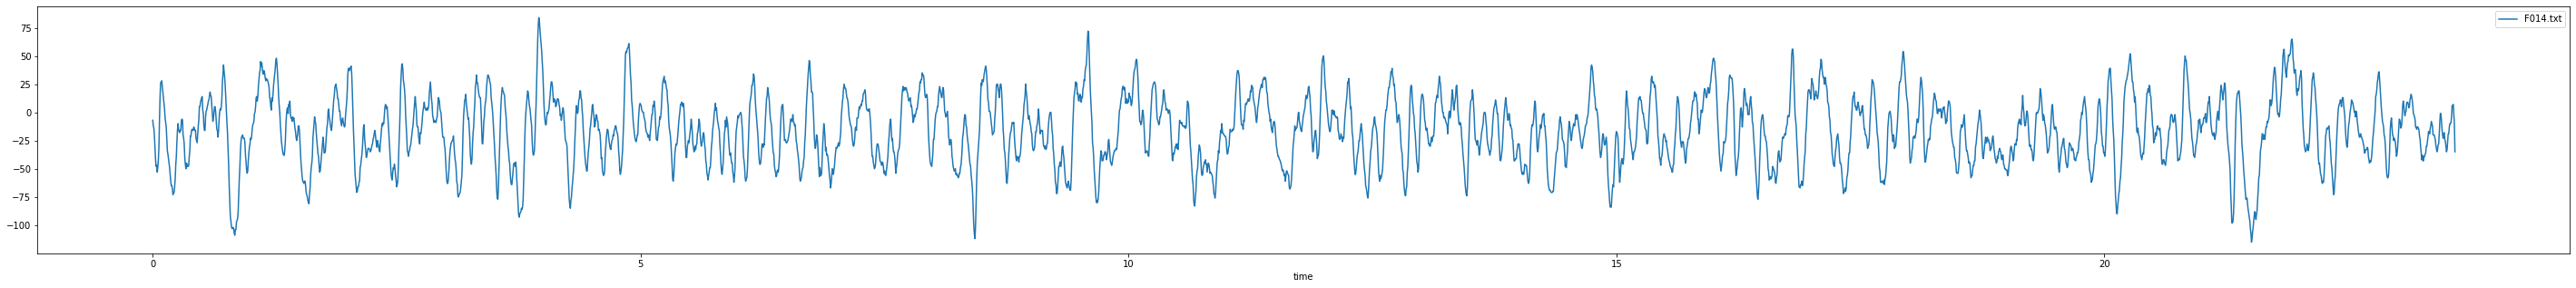

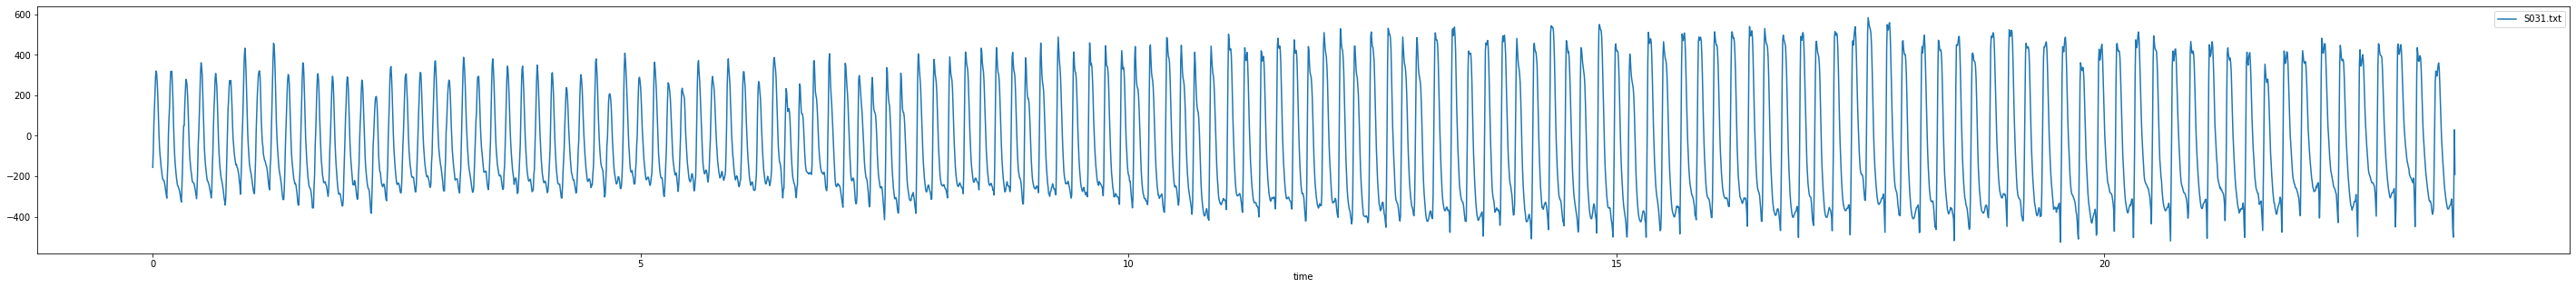

In [6]:
plt.rcParams['figure.figsize'] = [50, 5]
Set_A_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[0]
)[random.randint(0, 99)])
Set_B_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[1]
)[random.randint(0, 99)])
Set_C_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[2]
)[random.randint(0, 99)])
Set_D_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[3]
)[random.randint(0, 99)])
Set_E_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[4]
)[random.randint(0, 99)])
plt.show()

#**Criação dos tensors**
Especificações:
500 Sets de 3800 samples cada sendo eles


*   60% para treino (300)
*   20% para teste  (100)
*   20% para validação (100)




In [7]:
def create_array(dataframe, label):
  #dataframe = dataframe[:3800]

  numpy_data = dataframe[dataframe.columns[0:100]].to_numpy()
  numpy_data = numpy_data.transpose()
  
  labels = np.full((100, 1), label)

  return numpy_data, labels

def create_train_test_values(data_array, label_array, train_x, test_x, train_y, test_y):
  train_x_temp, test_x_temp, train_y_temp, test_y_temp = train_test_split(data_array, label_array, test_size = 0.2)
  
  train_x = np.concatenate([train_x, train_x_temp])
  test_x = np.concatenate([test_x, test_x_temp])
  train_y = np.concatenate([train_y, train_y_temp])
  test_y = np.concatenate([test_y, test_y_temp])

  return train_x, test_x, train_y, test_y




In [8]:
A_Data, A_Labels = create_array(Set_A_DataFrame, 0)
B_Data, B_Labels = create_array(Set_B_DataFrame, 0)
C_Data, C_Labels = create_array(Set_C_DataFrame, 1)
D_Data, D_Labels = create_array(Set_D_DataFrame, 1)
E_Data, E_Labels = create_array(Set_E_DataFrame, 2)


train_x, test_x, train_y, test_y = train_test_split(A_Data, A_Labels, test_size = 0.2)
train_x, test_x, train_y, test_y = create_train_test_values(B_Data, B_Labels, train_x, test_x, train_y, test_y)
train_x, test_x, train_y, test_y = create_train_test_values(C_Data, C_Labels, train_x, test_x, train_y, test_y)
train_x, test_x, train_y, test_y = create_train_test_values(D_Data, D_Labels, train_x, test_x, train_y, test_y)
train_x, test_x, train_y, test_y = create_train_test_values(E_Data, E_Labels, train_x, test_x, train_y, test_y)

train_x, train_y = shuffle(train_x, train_y, random_state=42)
test_x, test_y = shuffle(test_x, test_y, random_state=42)

print(train_x)
train_x = np.transpose(train_x)
test_x = np.transpose(test_x)
print(train_x.shape)

[[ 118  121  114 ...    6    5 -101]
 [ -50  -51  -50 ...  -31  -31  -48]
 [ -12    6   13 ...  -46  -30  -46]
 ...
 [ -28  -44  -63 ...   25   12  -54]
 [-235  -94  116 ... -365 -274  149]
 [  98  178  236 ...    0  -12  -16]]
(4097, 400)


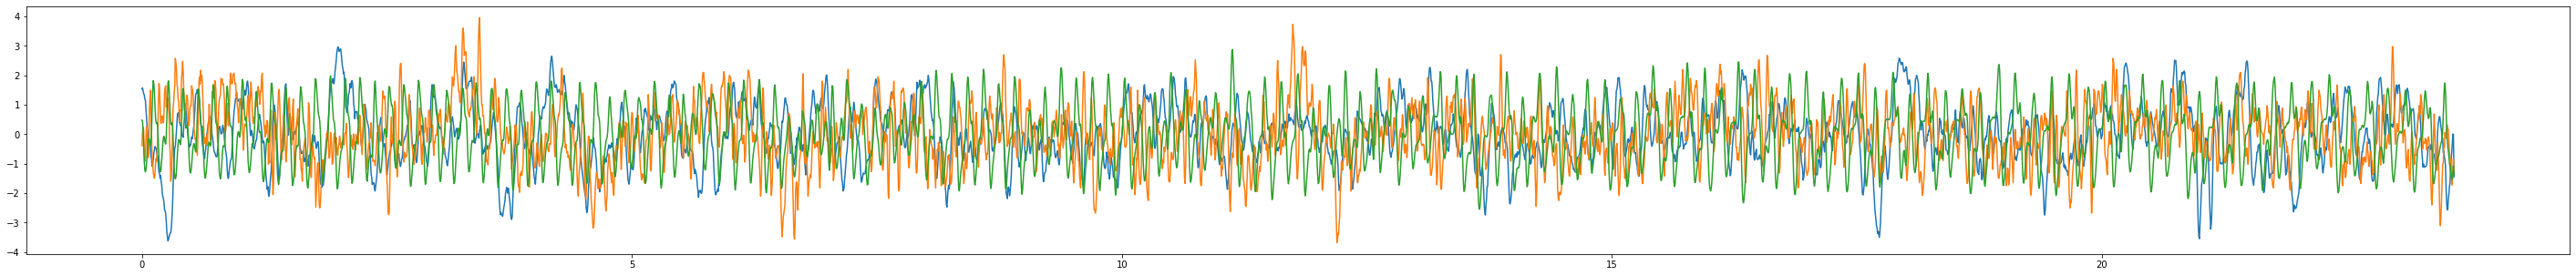

In [9]:
plt.rcParams['figure.figsize'] = [50, 5]

scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
train_x = np.transpose(train_x)

scaler = StandardScaler().fit(test_x)
test_x = scaler.transform(test_x)
test_x = np.transpose(test_x)

plt.plot(Set_A_DataFrame["time"], train_x[0])
plt.plot(Set_A_DataFrame["time"], train_x[2])
plt.plot(Set_A_DataFrame["time"], train_x[6])

plt.show()

In [10]:
from torch.utils.data import DataLoader

print(train_x.shape)
print(train_y.shape)

#Dividir os 90% de testes em 70% teste e 30% validação
train_x, validation_x, train_y, validation_y = train_test_split(train_x, train_y, test_size = 0.3)

train_x = torch.as_tensor(train_x, dtype=torch.float32)
validation_x = torch.as_tensor(validation_x, dtype=torch.float32)
test_x = torch.as_tensor(test_x, dtype=torch.float32)


train_data = []
for i in range(len(train_x)):
   train_data.append([train_x[i], train_y[i]])

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=3, drop_last=True)

validation_data = []
for i in range(len(validation_x)):
   validation_data.append([validation_x[i], validation_y[i]])

validation_loader = torch.utils.data.DataLoader(validation_data, shuffle=True, batch_size=3, drop_last=True)

(400, 4097)
(400, 1)


# **Criação da rede neural**

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Neural_Net(Module):   
   
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 4, 6, stride=1)
        self.pool1 = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(4, 4, 5, stride=1)
        self.pool2 = nn.MaxPool1d(2, 2)
        self.conv3 = nn.Conv1d(4, 10, 4, stride=1)
        self.pool3 = nn.MaxPool1d(2, 2)
        self.conv4 = nn.Conv1d(10, 10, 4, stride=1)
        self.pool4 = nn.MaxPool1d(2, 2)
        self.conv5 = nn.Conv1d(10, 15, 4, stride=1)
        self.pool5 = nn.MaxPool1d(2, 2)
        self.linear1 = nn.Linear(125*15, 50)
        self.linear2 = nn.Linear(50, 20)
        self.linear3 = nn.Linear(20, 3)
        self.relu = nn.LeakyReLU()
        self.smax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.unsqueeze(1)
        #Fase I (Conv+MaxPool)
        s1= self.conv1(x)        #(Batch, 4, 4092)
        s1= self.pool1(s1)       #(Batch, 4, 2046)
        s1= self.relu(s1)    
        #Fase II (Conv+MaxPool)
        s2= self.conv2(s1)       #(Batch, 4, 2042)
        s2= self.pool2(s2)       #(Batch, 4, 1021)
        s2= self.relu(s2)    
        #Fase III (Conv+MaxPool)
        s3= self.conv3(s2)       #(Batch, 10, 1018)
        s3= self.pool3(s3)       #(Batch, 10, 509)
        s3= self.relu(s3)    
        #Fase IV (Conv+MaxPool)
        s4= self.conv4(s3)       #(Batch, 10, 506)
        s4= self.pool4(s4)       #(Batch, 10, 253)
        s4= self.relu(s4)
        #Fase V (Conv+MaxPool)
        s5= self.conv5(s4)       #(Batch, 15, 250)
        s5= self.pool5(s5)       #(Batch, 15, 125)
        s5= self.relu(s5)
        #Fase VI (Fully Connected Layers)
        s6= torch.flatten(s5, 1) #(Batch, 15*125)
        s6= self.linear1(s6)     #(Batch, 50)
        s6= self.relu(s6)
        s6= self.linear2(s6)     #(Batch, 20)
        s6= self.relu(s6)
        s6= self.linear3(s6)     #(Batch, 3)
        s6= self.smax(s6)

        return s6

model = Neural_Net()
print(model)

Neural_Net(
  (conv1): Conv1d(1, 4, kernel_size=(6,), stride=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(4, 10, kernel_size=(4,), stride=(1,))
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(10, 10, kernel_size=(4,), stride=(1,))
  (pool4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv1d(10, 15, kernel_size=(4,), stride=(1,))
  (pool5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1875, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=3, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (smax): Softmax(dim=1)
)


In [12]:
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.3)

# Training Function 
def train(num_epochs): 
    best_accuracy = 0.0 
     
    print("Começando treinamento...") 
    for epoch in range(1, num_epochs+1): 
        running_train_loss = 0.0 
        running_accuracy = 0.0 
        running_vall_loss = 0.0 
        total = 0 
 
        # Training Loop 
        for data in train_loader: 
        #for data in enumerate(1, train_loader): 
            inputs, outputs = data  # get the input and real species as outputs; data is a list of [inputs, outputs] 
            optimizer.zero_grad()   # zero the parameter gradients          
            predicted_outputs = model(inputs)   # predict output from the model 
            outputs = outputs.squeeze_()  
            train_loss = loss_fn(predicted_outputs, outputs)   # calculate loss for the predicted output  
            train_loss.backward()   # backpropagate the loss 
            optimizer.step()        # adjust parameters based on the calculated gradients 
            running_train_loss +=train_loss.item()  # track the loss value 
 
        # Calculate training loss value 
        train_loss_value = running_train_loss/len(train_loader) 
        train_losses.append(train_loss_value)
 
        # Validation Loop 
        with torch.no_grad(): 
            model.eval() 
            for data in validation_loader: 
               inputs, outputs = data 
               predicted_outputs = model(inputs)
               outputs = outputs.squeeze_()    
               val_loss = loss_fn(predicted_outputs, outputs) 
               # The label with the highest value will be our prediction 
               _, predicted = torch.max(predicted_outputs, 1) 
               running_vall_loss += val_loss.item()  
               total += outputs.size(0) 
               running_accuracy += (predicted == outputs).sum().item() 
 
        # Calculate validation loss value 
        val_loss_value = running_vall_loss/len(validation_loader)
        validation_losses.append(val_loss_value)
 
                
        # Calculate accuracy as the number of correct predictions in the validation batch divided by the total number of predictions done.  
        accuracy = (100 * running_accuracy / total)     
 
        # Save the model if the accuracy is the best 
        if accuracy > best_accuracy: 
            saveModel() 
            best_accuracy = accuracy 
         
        # Print the statistics of the epoch 
        print('Completed training batch', epoch, 'Training Loss is: %.4f' %train_loss_value, 'Validation Loss is: %.4f' %val_loss_value, 'Accuracy is %d %%' % (accuracy))

In [13]:
# Define your execution device 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print("The model will be running on", device, "device\n") 
model.to(device)    # Convert model parameters and buffers to CPU or Cuda 

# Function to save the model 
def saveModel(): 
    path_model = '/content/drive/MyDrive/EEG_BonnDataset/best_model/NetModel.pth'
    torch.save(model.state_dict(), path_model)

The model will be running on cpu device



In [14]:
validation_losses = []
train_losses = []

num_epochs = 150
train(num_epochs) 
print('Finished Training\n')

Começando treinamento...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Completed training batch 1 Training Loss is: 1.0977 Validation Loss is: 1.0994 Accuracy is 36 %
Completed training batch 2 Training Loss is: 1.0970 Validation Loss is: 1.0989 Accuracy is 36 %
Completed training batch 3 Training Loss is: 1.0962 Validation Loss is: 1.0985 Accuracy is 36 %
Completed training batch 4 Training Loss is: 1.0954 Validation Loss is: 1.0980 Accuracy is 36 %
Completed training batch 5 Training Loss is: 1.0950 Validation Loss is: 1.0976 Accuracy is 36 %
Completed training batch 6 Training Loss is: 1.0940 Validation Loss is: 1.0971 Accuracy is 36 %
Completed training batch 7 Training Loss is: 1.0933 Validation Loss is: 1.0968 Accuracy is 36 %
Completed training batch 8 Training Loss is: 1.0929 Validation Loss is: 1.0964 Accuracy is 36 %
Completed training batch 9 Training Loss is: 1.0920 Validation Loss is: 1.0961 Accuracy is 36 %
Completed training batch 10 Training Loss is: 1.0914 Validation Loss is: 1.0958 Accuracy is 36 %
Completed training batch 11 Training Lo

In [15]:
test_data = []
for i in range(len(test_x)):
   test_data.append([test_x[i], test_y[i]])

test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=1, drop_last=True)

print(test_loader)

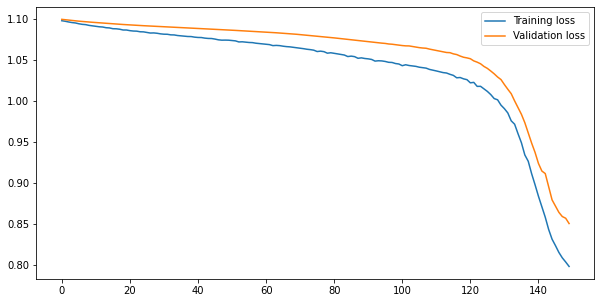

In [19]:
# Plotar o loss do treino e validação 
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(train_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()
plt.show()

In [16]:
# Function to test the model 
def test(): 
    # Load the model that we saved at the end of the training loop 
    path_model = '/content/drive/MyDrive/EEG_BonnDataset/best_model/NetModel.pth'
    model.load_state_dict(torch.load(path_model)) 
     
    running_accuracy = 0 
    total = 0 
 
    with torch.no_grad(): 
        for data in test_loader: 
            inputs, outputs = data 
            outputs = outputs.squeeze_()  
            predicted_outputs = model(inputs)
            _, predicted = torch.max(predicted_outputs, 1) 
            total += outputs
            running_accuracy += (predicted == outputs).sum().item() 
 
        print('Accuracy of the model based on the test set of 100 inputs is: %d %%' % (100 * running_accuracy / total))    

In [17]:
test() 

Accuracy of the model based on the test set of 100 inputs is: 96 %
